In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

/home/kuba/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
np.set_printoptions(suppress=True, precision=5)

In [3]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [4]:
with open(os.path.join(KatalogPickli, "Ecola-wygladzone-ustandaryzowane.pickle"), "rb") as plik:
    szeregi=pickle.load(plik)
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627657263.3618839-SCradius-10.0.pickle"), "rb") as plik:
    odl=pickle.load(plik)

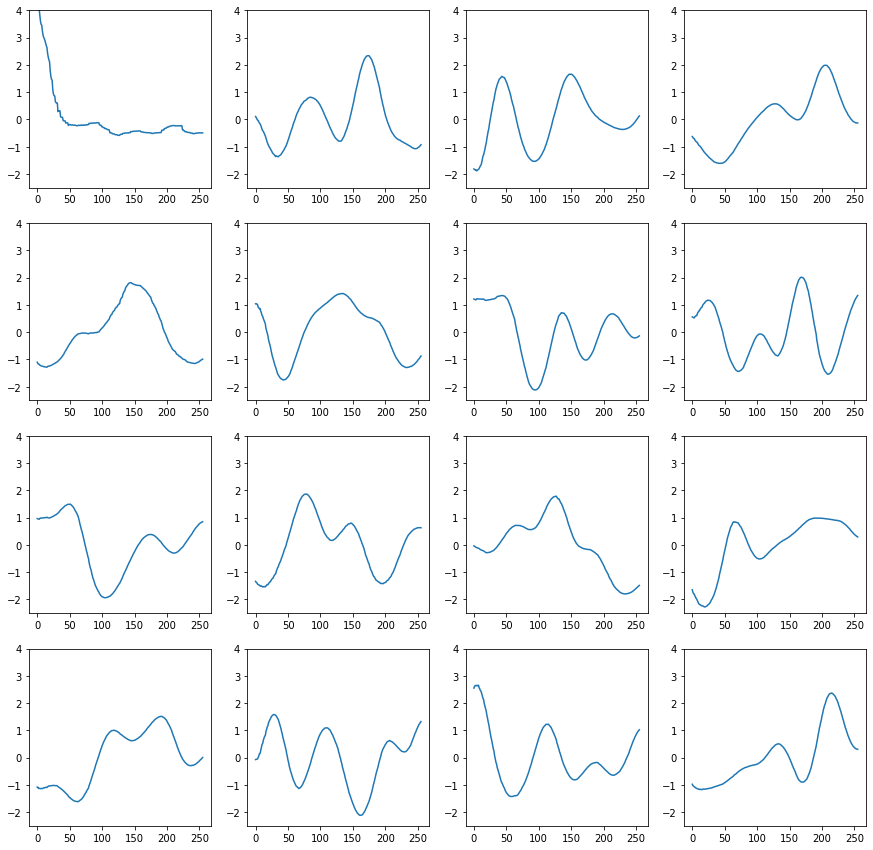

In [5]:
plt.gcf().set_size_inches(15,15)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.ylim(-2.5, 4)
    #plt.tick_params(axis='both',which='both', bottom=False,top=False, left=False, labelleft=False, labelbottom=False)
    plt.plot(szeregi[i,:])

# Softdtw

### Wykres silhouette

In [6]:
reExpr=re.compile(r".*-SCradius-10-dtw\.pickle")
reExprOdl=re.compile(r".*odl.*")

In [7]:
listaPasujacych=[]
for plik in os.listdir("../src/OutDir"):
    if reExpr.match(plik) is not None and reExprOdl.match(plik) is None:
        listaPasujacych.append(plik)

In [8]:
listaPasujacych

['Ecola-wygladzone-ustandaryzowane.pickle-1627657149.3626323-n_cluster-4-SCradius-10-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627657496.7196052-n_cluster-6-SCradius-10-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627657677.2209384-n_cluster-7-SCradius-10-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627655939.4272141-n_cluster-3-SCradius-10-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627656690.6992385-n_cluster-5-SCradius-10-dtw.pickle',
 'Ecola-wygladzone-ustandaryzowane.pickle-1627656884.2895188-n_cluster-2-SCradius-10-dtw.pickle']

In [10]:
listaSilhouetteScore=[None for i in range(6)]
for plik in listaPasujacych:
    with open(os.path.join("../src/OutDir/",plik), "rb") as file:
        model=pickle.load(file)
    etykiety=model.predict(szeregi)
    ocena=silhouette_score(odl, etykiety, metric="precomputed")
    listaSilhouetteScore[model.n_clusters-2]=ocena

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dime

In [11]:
listaSilhouetteScore

[0.15940099608508407,
 0.17585189026276973,
 0.17317434394547165,
 0.16333767740561497,
 0.148009266467461,
 0.15292564170792586]

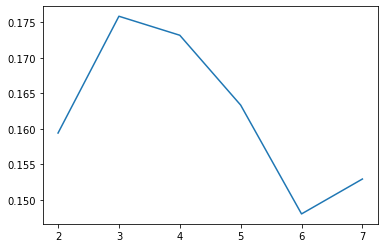

In [12]:
plt.plot(range(2,8), listaSilhouetteScore)

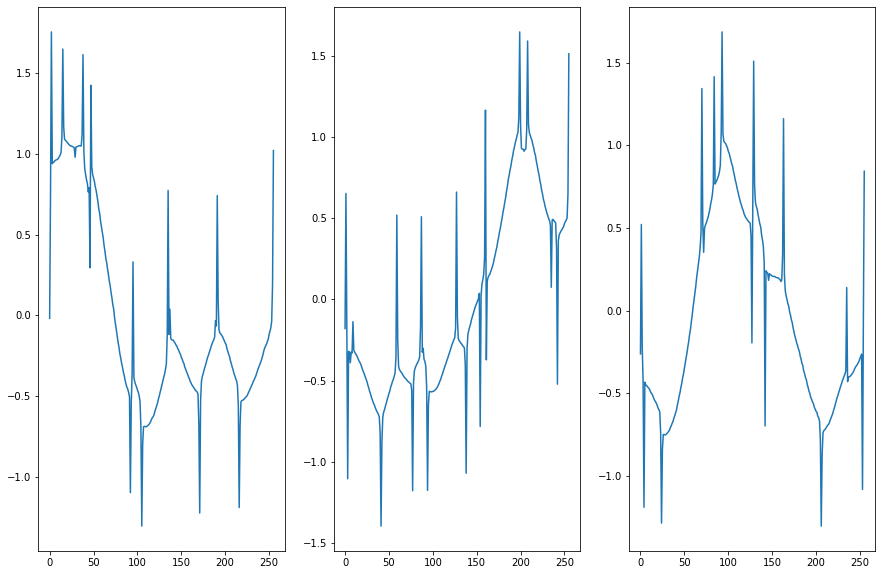

In [15]:
with open(os.path.join("../src/OutDir/",'Ecola-wygladzone-ustandaryzowane.pickle-1627655939.4272141-n_cluster-3-SCradius-10-dtw.pickle'), "rb") as file:
        model=pickle.load(file)
plt.gcf().set_size_inches(15,10)
for i in range(3):
    plt.subplot(1,3,i+1)
    #plt.ylim(0.015, 0.035)
    plt.plot(model.cluster_centers_[i].ravel())

In [7]:
etykiety=model.predict(szeregi)

/home/kuba/.local/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4305 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


### KMeans 

In [13]:
kmeansSilList=[]
for i in range(2,8):
    kmeans=KMeans(i)
    predictKMeans=kmeans.fit_predict(szeregi)
    ocena=silhouette_score(odl, predictKMeans, metric="precomputed")
    kmeansSilList.append(ocena)
kmeansSilList

[0.1817252274895789,
 0.1816307132191439,
 0.17924170585975,
 0.16614793126764066,
 0.1556639212882966,
 0.15418472444199965]

In [14]:
rozniceSil=np.array(listaSilhouetteScore)-np.array(kmeansSilList)
rozniceSil

array([-0.02232, -0.00578, -0.00607, -0.00281, -0.00765, -0.00126])